数据加载成功！

--- 任务1: 欧盟 27 国累计总损失 ---
欧盟 27 国累计总损失 (1980-2022): 822,624 百万欧元 (即 0.82 万亿欧元或 822.6 亿欧元)

--- 任务2: 年均损失增长趋势 ---
80年代 (1980-89) 年均损失: 8,616 百万欧元
近十年 (2013-22) 年均损失: 29,413 百万欧元
年均损失增幅: 241.4%

--- 任务3: 损失驱动因素占比 ---
各类事件损失明细 (EU27):
dimension_label
Economic losses from weather- and climate-related extremes - Losses by climatological events    212508.0
Economic losses from weather- and climate-related extremes - Losses by hydrological events      385762.0
Economic losses from weather- and climate-related extremes - Losses by meteorological events    224357.0
Name: obs_value, dtype: float64

总计已分类损失: 822,627 百万欧元
水文事件 (Economic losses from weather- and climate-related extremes - Losses by hydrological events) 
占比: 46.9%

--- 任务4: 高风险地理区域占比 ---
德国、意大利、法国三国总损失: 470,242 百万欧元
所有国家总损失 (排除EU27): 879,913 百万欧元
德、意、法三国占比: 53.4%

--- 任务5: 损失驱动因素饼图 ---


<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\498441121.py:13: SyntaxWarning: invalid escape sequence '\p'
  file_path = 'D:\python_demo\coding\data\欧洲各国与气候相关损失.csv'


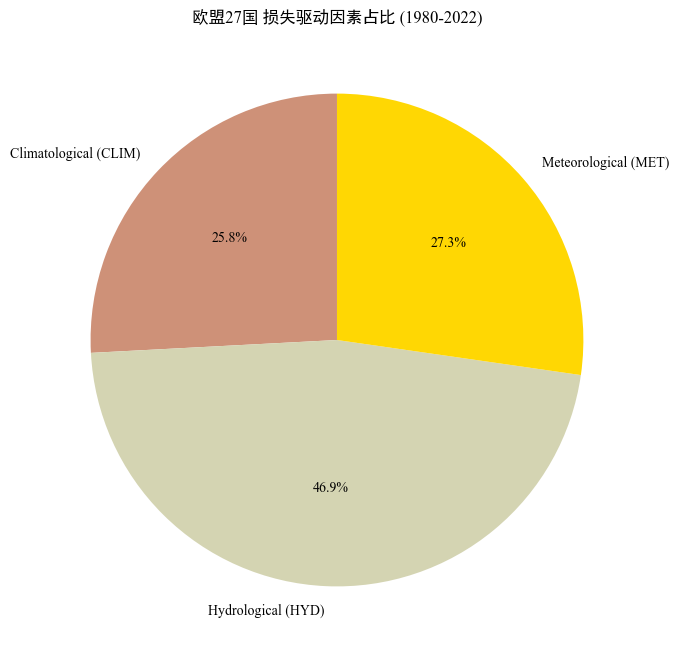


--- 任务6: 高风险地理区域饼图 ---


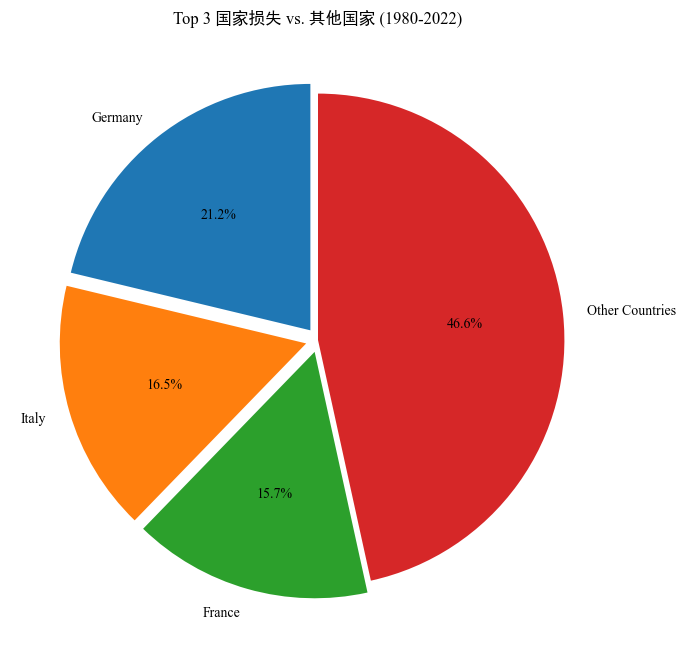

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 0. 设置字体 (确保中文显示) ---
plt.rcParams['font.family'] = ['Times New Roman', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题


# ---
# 加载数据
# (请确保 '欧洲各国与气候相关损失.csv' 文件与此脚本在同一目录)
file_path = 'D:\python_demo\coding\data\欧洲各国与气候相关损失.csv'
try:
    df = pd.read_csv(file_path)
    print("数据加载成功！\n")
except FileNotFoundError:
    print(f"错误：文件 '{file_path}' 未找到。")
    # 如果在脚本环境中，最好退出
    # exit()

# 任务1: 量化1980-2022年欧洲气候相关经济损失（累计8,226亿欧元）
# (注：8,226亿欧元 = 822,624 百万欧元)
# ---
print("--- 任务1: 欧盟 27 国累计总损失 ---")
# 1. 筛选欧盟27国的总体损失 (LOSS)
eu_total_loss_df = df[
    (df['geo_label'] == 'European Union - 27 countries (from 2020)') &
    (df['dimension'] == 'LOSS')
].copy()
# 2. 计算总和
total_loss_eu = eu_total_loss_df['obs_value'].sum()
print(f"欧盟 27 国累计总损失 (1980-2022): {total_loss_eu:,.0f} 百万欧元 (即 {total_loss_eu/1_000_000:,.2f} 万亿欧元或 {total_loss_eu/1000:,.1f} 亿欧元)")


# ---
# 任务2: 明确损失年均增长趋势（241.4%）
# (对比 1980-1989 年均 与 2013-2022 年均)
# ---
print("\n--- 任务2: 年均损失增长趋势 ---")
# 1. 计算第一个十年 (1980-1989) 的年均损失
avg_loss_1980s = eu_total_loss_df[
    (eu_total_loss_df['time'] >= 1980) & (eu_total_loss_df['time'] <= 1989)
]['obs_value'].mean()

# 2. 计算最近一个十年 (2013-2022) 的年均损失
avg_loss_2010s_plus = eu_total_loss_df[
    (eu_total_loss_df['time'] >= 2013) & (eu_total_loss_df['time'] <= 2022)
]['obs_value'].mean()

# 3. 计算增幅
trend_increase_percent = ((avg_loss_2010s_plus - avg_loss_1980s) / avg_loss_1980s) * 100
print(f"80年代 (1980-89) 年均损失: {avg_loss_1980s:,.0f} 百万欧元")
print(f"近十年 (2013-22) 年均损失: {avg_loss_2010s_plus:,.0f} 百万欧元")
print(f"年均损失增幅: {trend_increase_percent:,.1f}%")


# ---
# 任务3: 识别损失的主要驱动因素（水文事件占46.9%）
# ---
print("\n--- 任务3: 损失驱动因素占比 ---")
# 1. 筛选欧盟27国的三种损失子类型
eu_breakdown_df = df[
    (df['geo_label'] == 'European Union - 27 countries (from 2020)') &
    (df['dimension'].isin(['LOSS_MET', 'LOSS_HYD', 'LOSS_CLIM']))
].copy()
# 2. 按 'dimension_label' (描述性标签) 分组求和
driver_summary = eu_breakdown_df.groupby('dimension_label')['obs_value'].sum()
total_breakdown_sum = driver_summary.sum()

# 3. 找出水文事件的标签
# (CSV中的 'dimension_label' 是 'Economic losses from weather- and climate-related extremes - Losses by hydrological events')
hydrological_label = 'Economic losses from weather- and climate-related extremes - Losses by hydrological events'
hydrological_percent = (driver_summary[hydrological_label] / total_breakdown_sum) * 100

print(f"各类事件损失明细 (EU27):\n{driver_summary}")
print(f"\n总计已分类损失: {total_breakdown_sum:,.0f} 百万欧元")
print(f"水文事件 ({hydrological_label}) \n占比: {hydrological_percent:,.1f}%")


# ---
# 任务4: 识别高风险地理区域（德、意、法占53.4%）
# ---
print("\n--- 任务4: 高风险地理区域占比 ---")
# 1. 筛选所有国家的总损失 (LOSS)，并排除EU27这个汇总项
country_losses_df = df[
    (df['dimension'] == 'LOSS') &
    (df['geo_label'] != 'European Union - 27 countries (from 2020)')
].copy()

# 2. 计算每个国家的总和
total_loss_by_country = country_losses_df.groupby('geo_label')['obs_value'].sum()

# 3. 计算所有国家的总和
total_country_loss = total_loss_by_country.sum()

# 4. 提取德、意、法的损失
top_3_countries = ['Germany', 'Italy', 'France']
top_3_loss_sum = total_loss_by_country[top_3_countries].sum()
# 5. 计算 "Other"
other_loss_sum = total_country_loss - top_3_loss_sum

# 6. 计算百分比
top_3_percent = (top_3_loss_sum / total_country_loss) * 100

print(f"德国、意大利、法国三国总损失: {top_3_loss_sum:,.0f} 百万欧元")
print(f"所有国家总损失 (排除EU27): {total_country_loss:,.0f} 百万欧元")
print(f"德、意、法三国占比: {top_3_percent:,.1f}%")


# ---
# 任务5: 生成损失驱动因素饼图 (基于任务3)
# ---
print("\n--- 任务5: 损失驱动因素饼图 ---")

# 简化标签
labels_map = {
    'Economic losses from weather- and climate-related extremes - Losses by climatological events': 'Climatological (CLIM)',
    'Economic losses from weather- and climate-related extremes - Losses by hydrological events': 'Hydrological (HYD)',
    'Economic losses from weather- and climate-related extremes - Losses by meteorological events': 'Meteorological (MET)'
}
pie_labels = driver_summary.index.map(labels_map)
pie_values = driver_summary.values

plt.figure(figsize=(8, 8))
# 使用您在堆叠条形图中使用的颜色 (按字母顺序 CLIM, HYD, MET)
colors = ['#ce9178', '#d4d4b2', '#ffd703'] 

plt.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('欧盟27国 损失驱动因素占比 (1980-2022)')
[plt.show()]


# ---
# 任务6: 生成高风险地理区域饼图 (基于任务4)
# ---
print("\n--- 任务6: 高风险地理区域饼图 ---")
plt.figure(figsize=(16, 8))
pie_labels_countries = top_3_countries + ['Other Countries']
pie_values_countries = total_loss_by_country[top_3_countries].tolist() + [other_loss_sum]
explode = (0.05, 0.05, 0.05, 0) # 突出显示 Top 3

plt.pie(pie_values_countries, labels=pie_labels_countries, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Top 3 国家损失 vs. 其他国家 (1980-2022)')
plt.show()



<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\101889240.py:12: SyntaxWarning: invalid escape sequence '\p'
  file_path = 'D:\python_demo\coding\data\欧洲各国与气候相关损失.csv'


数据加载成功！

正在生成图表1：EU27 总体损失趋势...


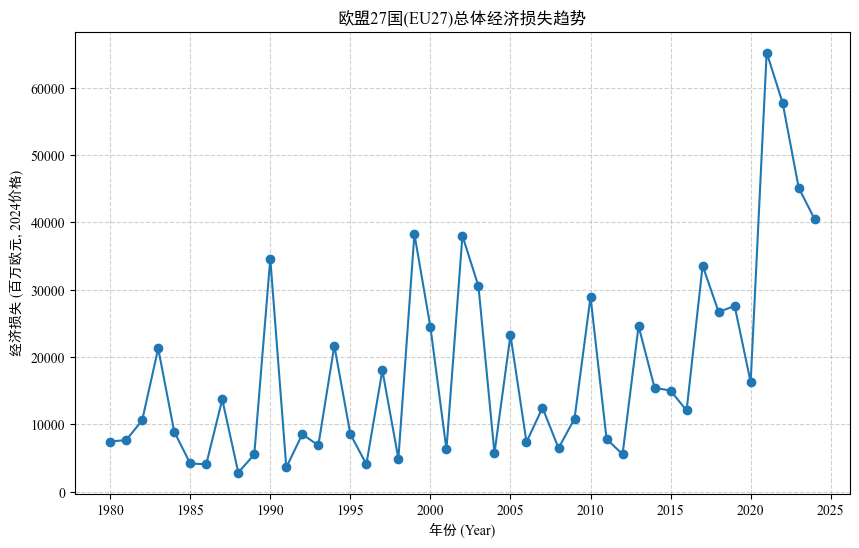


正在生成图表2：Top 15 损失国家...


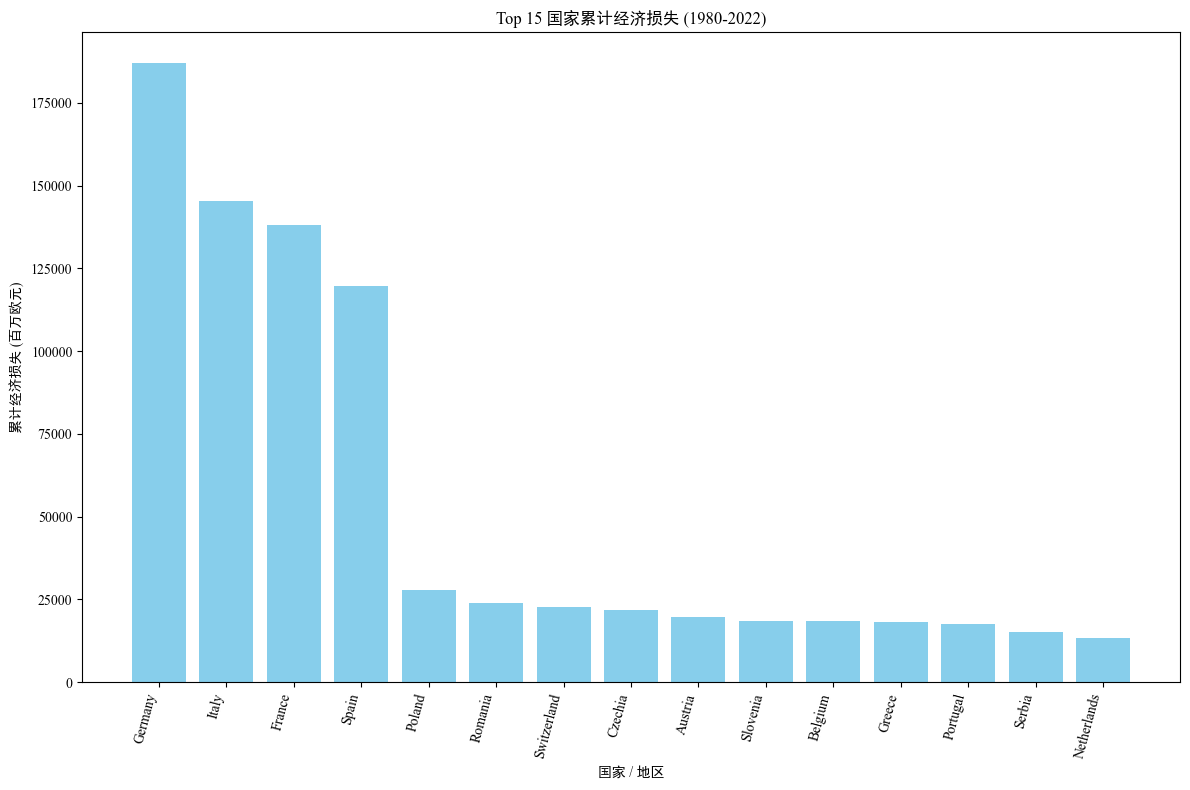


正在生成图表3：EU27 损失类型分解...


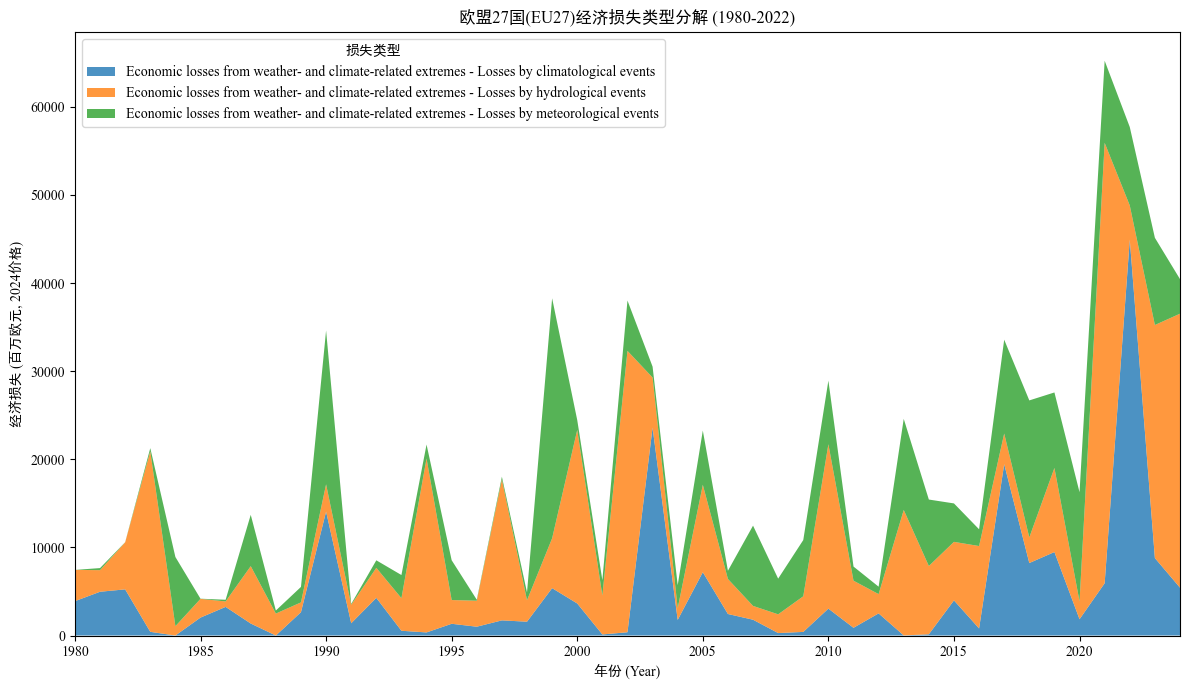

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 0. 设置字体 (确保中文显示) ---
# (请根据您的系统选择可用的中文字体)
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# --- 1. 准备工作：加载数据 ---
file_path = 'D:\python_demo\coding\data\欧洲各国与气候相关损失.csv'
df = pd.read_csv(file_path)
print("数据加载成功！")

# --- 2. 图表一：欧盟27国(EU27)总体经济损失趋势 (折线图) ---
print("\n正在生成图表1：EU27 总体损失趋势...")

# 筛选数据
eu_total_loss_df = df[
    (df['geo_label'] == 'European Union - 27 countries (from 2020)') &
    (df['dimension'] == 'LOSS')
].copy()

# 清理数据：确保年份是整数，并按年份排序
eu_total_loss_df['time'] = eu_total_loss_df['time'].astype(int)
eu_total_loss_df = eu_total_loss_df.sort_values(by='time')

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(eu_total_loss_df['time'], eu_total_loss_df['obs_value'], marker='o', linestyle='-')

# 设置标题和标签
plt.title('欧盟27国(EU27)总体经济损失趋势')
plt.xlabel('年份 (Year)')
plt.ylabel('经济损失 (百万欧元, 2024价格)')

# 设置X轴为整数（年份）
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid(True, linestyle='--', alpha=0.6)

# 保存图表
plt.show()


# --- 3. 图表二：损失最严重的 Top 15 国家 (条形图) ---
print("\n正在生成图表2：Top 15 损失国家...")

# 筛选数据
country_losses_df = df[
    (df['dimension'] == 'LOSS') &
    (df['geo_label'] != 'European Union - 27 countries (from 2020)')
].copy()

# 计算累计损失
total_loss_by_country = country_losses_df.groupby('geo_label')['obs_value'].sum().reset_index()

# 排序并选取前15
top_15_countries = total_loss_by_country.sort_values(by='obs_value', ascending=False).head(15)

# 创建画布
plt.figure(figsize=(12, 8))

# 绘制条形图
plt.bar(top_15_countries['geo_label'], top_15_countries['obs_value'], color='skyblue')

# 设置标题和标签
plt.title('Top 15 国家累计经济损失 (1980-2022)')
plt.xlabel('国家 / 地区')
plt.ylabel('累计经济损失 (百万欧元)')

# 旋转X轴标签
plt.xticks(rotation=75, ha='right')

# 调整布局防止标签被截断
plt.tight_layout()
plt.show()


# --- 4. 图表三：欧盟27国(EU27)经济损失类型分解 (堆叠面积图) ---
print("\n正在生成图表3：EU27 损失类型分解...")

# 筛选数据
eu_loss_breakdown_df = df[
    (df['geo_label'] == 'European Union - 27 countries (from 2020)') &
    (df['dimension'].isin(['LOSS_MET', 'LOSS_HYD', 'LOSS_CLIM']))
].copy()

# 数据透视：将长格式转换为宽格式，以便堆叠
pivot_df = eu_loss_breakdown_df.pivot_table(
    index='time',
    columns='dimension_label',
    values='obs_value',
    fill_value=0 # 用0填充缺失的年份/类型组合
)

pivot_df = pivot_df.sort_index()

# 获取年份和各个类型的数据列
years = pivot_df.index
labels = pivot_df.columns
data_to_stack = np.vstack([pivot_df[col].values for col in labels])

# 创建画布
plt.figure(figsize=(12, 7))

# 绘制堆叠面积图
plt.stackplot(years, data_to_stack, labels=labels, alpha=0.8)

# 设置标题和标签
plt.title('欧盟27国(EU27)经济损失类型分解 (1980-2022)')
plt.xlabel('年份 (Year)')
plt.ylabel('经济损失 (百万欧元, 2024价格)')

# 添加图例
plt.legend(loc='upper left', title='损失类型')

# 设置X轴为整数（年份）
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlim(min(years), max(years))

# 调整布局
plt.tight_layout()

# 保存图表
plt.show()


正在准备数据...
加载数据失败: [Errno 2] No such file or directory: '欧洲各国与气候相关损失.csv'
数据准备完毕，df_plot 已创建。
开始绘图...


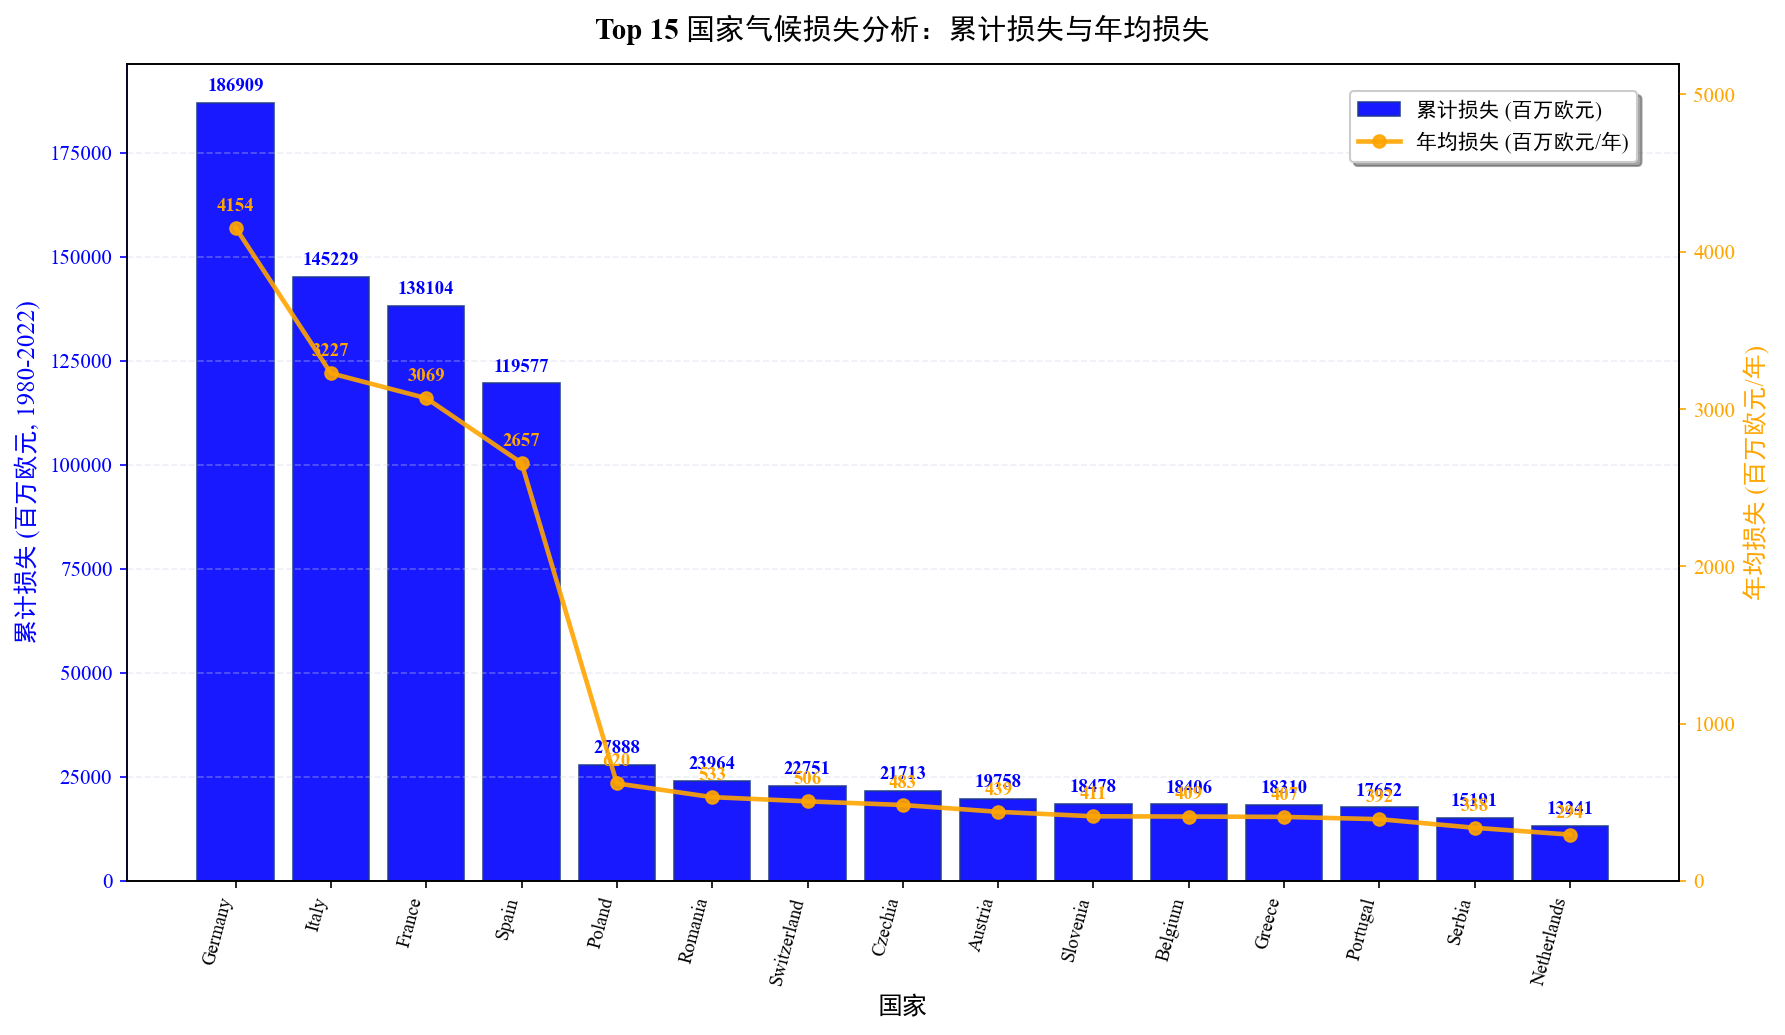

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 准备数据 ---
print("正在准备数据...")
file_path = '欧洲各国与气候相关损失.csv'
try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"加载数据失败: {e}")
    # 如果在脚本中，这里应该 exit()

# 筛选国家数据，排除欧盟汇总
country_losses_df = df[
    (df['dimension'] == 'LOSS') &
    (df['geo_label'] != 'European Union - 27 countries (from 2020)')
].copy()

# 按国家分组，计算总损失和有数据的年份数量
grouped = country_losses_df.groupby('geo_label')['obs_value']
summary_df = grouped.agg(
    Total_Loss='sum',
    Data_Years='count' # 统计非空观测值的数量
).reset_index()

# 计算年均损失（仅基于有数据的年份）
summary_df['Average_Loss'] = summary_df['Total_Loss'] / summary_df['Data_Years']

# 筛选出 Top 15 累计损失国家
df_plot = summary_df.sort_values(by='Total_Loss', ascending=False).head(15).copy()
# 重置索引，以便于后续 i, v 循环
df_plot = df_plot.reset_index(drop=True)
print("数据准备完毕，df_plot 已创建。")


# --- 2. 套用你提供的绘图代码 ---
print("开始绘图...")

#设置x轴的位置，根据数据框df_plot的行数生成一个等间隔的数组（如0， 1， 2， 3 ）
x = np.arange(len(df_plot))

#设置matplotlib字体，优先使用Times New Roman
# 添加 'SimHei' 作为中文字体回退选项，并设置 unicode 负号
plt.rcParams['font.family'] = ['Times New Roman', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False 

fig = plt.figure(figsize=(12, 7), dpi=150, facecolor='white') # 调整了尺寸以容纳15个国家

#获取当前图形的主轴左侧y轴
ax1 = plt.gca()

bar_color = 'blue'
line_color = 'orange'
text_blue = 'blue'
text_orange = 'orange'

#在主轴上绘图 (柱状图 - 累计损失)
bar = ax1.bar(
    x, df_plot['Total_Loss'],  # <-- 使用 'Total_Loss'
    color=bar_color, alpha=0.9,
    label='累计损失 (百万欧元)', # <-- 修改图例
    edgecolor='#1E3A8A', linewidth=0.8
)
#设置主轴标题
ax1.set_title('Top 15 国家气候损失分析：累计损失与年均损失', fontsize=14, pad=12, fontweight='bold') # <-- 修改标题
ax1.set_xticks(x) #设置刻度
ax1.set_xticklabels(df_plot['geo_label'] , rotation=75, ha='right', fontsize=9) # <-- 使用 'geo_label' 并旋转
#设置左侧y轴标签
ax1.set_ylabel('累计损失 (百万欧元, 1980-2022)', fontsize=12, color=bar_color) # <-- 修改 Y1 标签
ax1.set_xlabel('国家', fontsize=12) # <-- 修改 X 标签
#设置左侧y轴刻度颜色与文字颜色和柱形图一致
ax1.tick_params(axis='y', colors=bar_color)
ax1.spines['left'].set_color(bar_color)#设置左侧轴线颜色和柱图形颜色一样

# 添加柱状图的数值标签
for i, v in enumerate(df_plot['Total_Loss']): # <-- 使用 'Total_Loss'
    ax1.text(
        i, v + (df_plot['Total_Loss'].max() * 0.01), # 动态调整标签位置
        f'{v:.0f}', # 格式化为整数
        ha='center', va='bottom', fontsize=9, color=text_blue, fontweight='bold'
    )
ax1.grid(axis='y', linestyle='--', alpha=0.35, color='#CBD5E1')

# --- 右轴 ---
ax2 = ax1.twinx()
ax2.plot(
    x, df_plot['Average_Loss'], # <-- 使用 'Average_Loss'
    color=line_color, alpha=0.9,
    label='年均损失 (百万欧元/年)', # <-- 修改图例
    marker='o', markersize=6,
    linewidth=2.2
)
#设置右侧y轴标签
ax2.set_ylabel('年均损失 (百万欧元/年)', fontsize=12, color=line_color) # <-- 修改 Y2 标签
ax2.tick_params(axis='y', colors=line_color)
ax2.set_ylim(0, df_plot['Average_Loss'].max()*1.25) # <-- 使用 'Average_Loss'

# 添加折线图的数值标签
for i, v in enumerate(df_plot['Average_Loss']): # <-- 使用 'Average_Loss'
    ax2.text(
        i, v + (df_plot['Average_Loss'].max() * 0.02), # 动态调整标签位置
        f'{v:.0f}', # 格式化为整数
        ha='center', va='bottom', fontsize=9, color=text_orange,
        fontweight='bold'
    )

# --- 图例 ---
# (从 ax1 和 ax2 获取标签来自动生成图例)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, 
           loc=1, bbox_to_anchor=(.98, .98), # 调整位置
           fancybox=True, shadow=True, labelcolor='black', fontsize=10, frameon=True)

plt.tight_layout()
# plt.savefig('dual_axis_country_loss_custom_plt.png') # 保存文件
# print("绘图完毕！图表已保存为 'dual_axis_country_loss_custom_plt.png'")
plt.show()

数据准备完毕，t10 (Top 10) 数据框已创建。


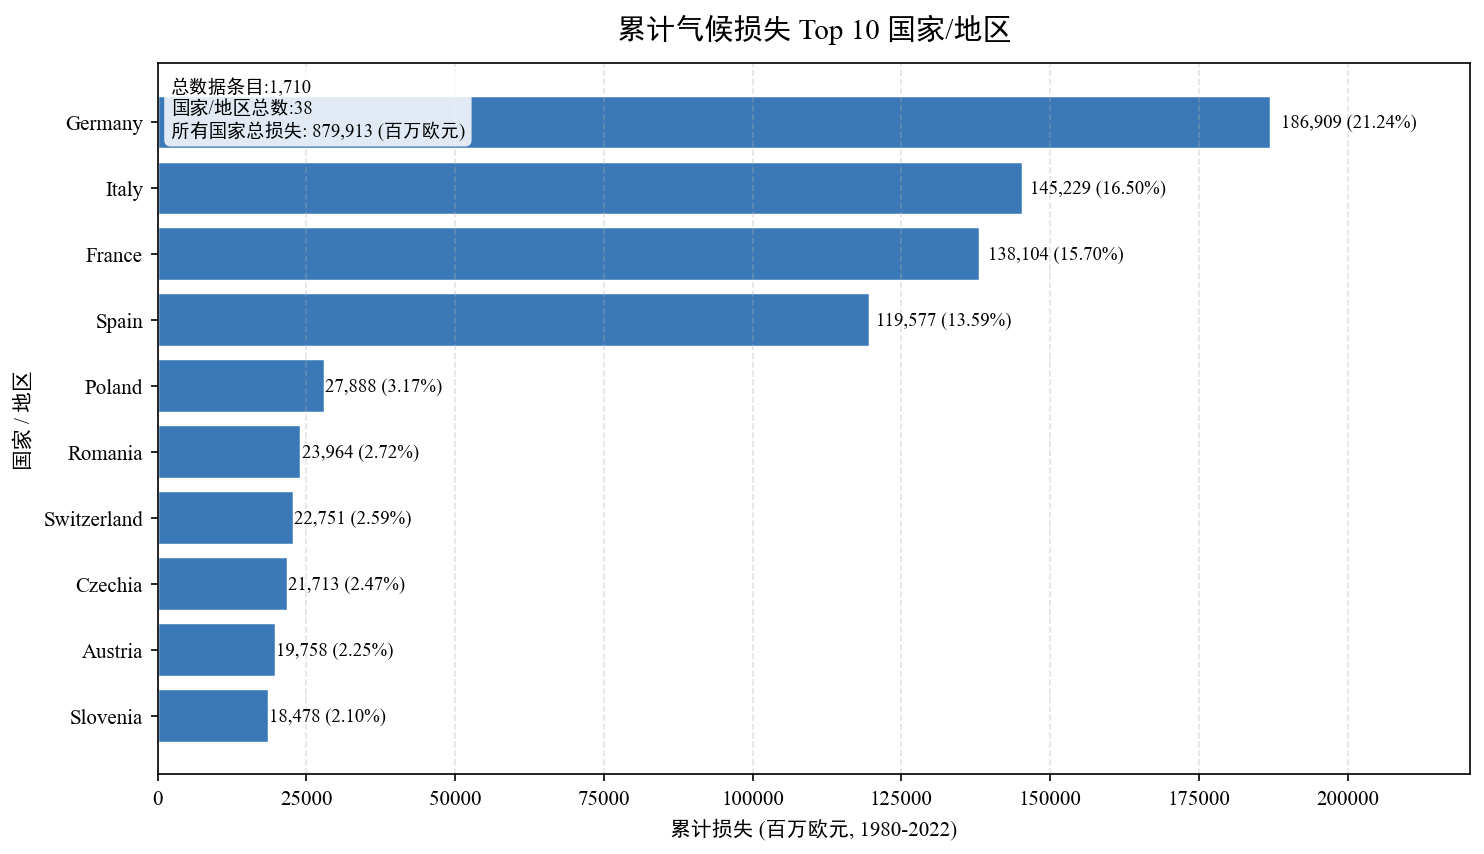

In [5]:
#横向条形图版本的 Top 10 国家气候损失分析
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import shorten #用于文本缩略显示


df = pd.read_csv(r'D:\python_demo\coding\data\欧洲各国与气候相关损失.csv')


# 筛选国家数据 ('LOSS')，排除欧盟汇总 ('EU27_2020')
country_losses_df = df[
    (df['dimension'] == 'LOSS') &
    (df['geo_label'] != 'European Union - 27 countries (from 2020)')
].copy()


# (用于计算占比)
# 计算所有国家的总损失
total_loss_all_countries = country_losses_df['obs_value'].sum()

# (用于角落文本框)
total_records = len(country_losses_df) # 总记录数 (所有国家的所有年份条目)
unique_countries = country_losses_df['geo_label'].nunique() # 唯一国家数

# 计算国家总损失
total_loss_by_country = country_losses_df.groupby('geo_label')['obs_value'].sum()

# 选取前10
top10 = (
    total_loss_by_country
    .nlargest(10)
    .reset_index()
    .rename(columns={'geo_label':'region', 'obs_value':'cnt'}) #重命名列
)


# 排序 (为了 barh 从上到下显示，需要升序排列数据)
t10 = top10.sort_values('cnt')
print("数据准备完毕，t10 (Top 10) 数据框已创建。")

plt.rcParams['figure.dpi' ] = 150
# 设置字体:优先黑体,微软雅黑,确保中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei','Arial'] 
# 解决坐标轴负号显示异常问题
plt.rcParams['axes.unicode_minus'] = False

fig, ax=plt.subplots(figsize=(10,5.8))#创建画布和子图,大小为10x5.8英寸

# 处理过长的地址标签:超过最大长度时截断并添加省略号
max_len= 18 #最大允许的标签长度(字符数)
labels = [shorten(s, width=max_len, placeholder='...') for s in t10['region']] # 对每个地址应用截断处理

# 绘制水平条形图
bars = ax.barh(
    labels,#y轴数据:处理后的地址标签
    t10['cnt'],#x轴数据:损失数值
    color='#3A78B7',
    edgecolor='white',#条形边框为白色
    linewidth=0.7 # 边框线宽0.7
)

# 设置图表标题和坐标轴标签
ax.set_title('累计气候损失 Top 10 国家/地区',fontsize=14,pad=12) # <-- 修改标题
ax.set_xlabel('累计损失 (百万欧元, 1980-2022)') # <-- 修改X轴标签
ax.set_ylabel('国家 / 地区') # <-- 修改Y轴标签

# 在条形末端标注具体数值与占比
total = total_loss_all_countries # (用于计算占比)
if total == 0:
    print("警告：总损失为0，百分比将无法计算或为0。")
    total = 1 # 避免除以零错误

for y, (name, cnt) in enumerate(zip(t10['region'],t10['cnt'])):#遍历每个地址及其y轴索引
    ax.text(
        cnt * 1.01, y, #文本位置:x为损失数的1.01倍,y为条形对应的y轴索引
        f'{cnt:,.0f} ({cnt/total*100 :.2f}%)',#文本内容: 损失数(整数) + 占总损失的百分比
        va='center', fontsize=9 #垂直居中对齐,字体9号
    )

# 网格线与x轴范围优化
ax.grid(axis='x', linestyle='--',alpha=0.35) #添加x轴虚线网格
xmin, xmax=0, top10['cnt'].max()*1.18 #x轴范围:从0到最大损失数的1.18倍
ax.set_xlim(xmin, xmax) #设置x轴范围
# ax.set_ylim(-0.5, len(t10['region']) + 0.7) #设置y轴范围,确保条形完整显示
# 在图表角落添加数据说明
ax.text(
    0.01, 0.98, #文本位置:相对于子图的比例坐标
    # 文本内容:
    f'总数据条目:{total_records:,}\n国家/地区总数:{unique_countries:,}\n所有国家总损失: {total:,.0f} (百万欧元)', # <-- 修改文本
    transform=ax.transAxes, ha='left', va='top', fontsize=9,#使用相对坐标,左对齐,顶部对齐
    bbox=dict(boxstyle='round,pad=0.35', facecolor='white', alpha =.85, lw=0) #添加白色半透明背景框
)

plt.tight_layout()#自动调整布局,避免元素重叠
# plt.savefig('horizontal_bar_top10_custom_plt.png') # <-- 保存图表
# print("绘图完毕！图表已保存为 'horizontal_bar_top10_custom_plt.png'")
plt.show()

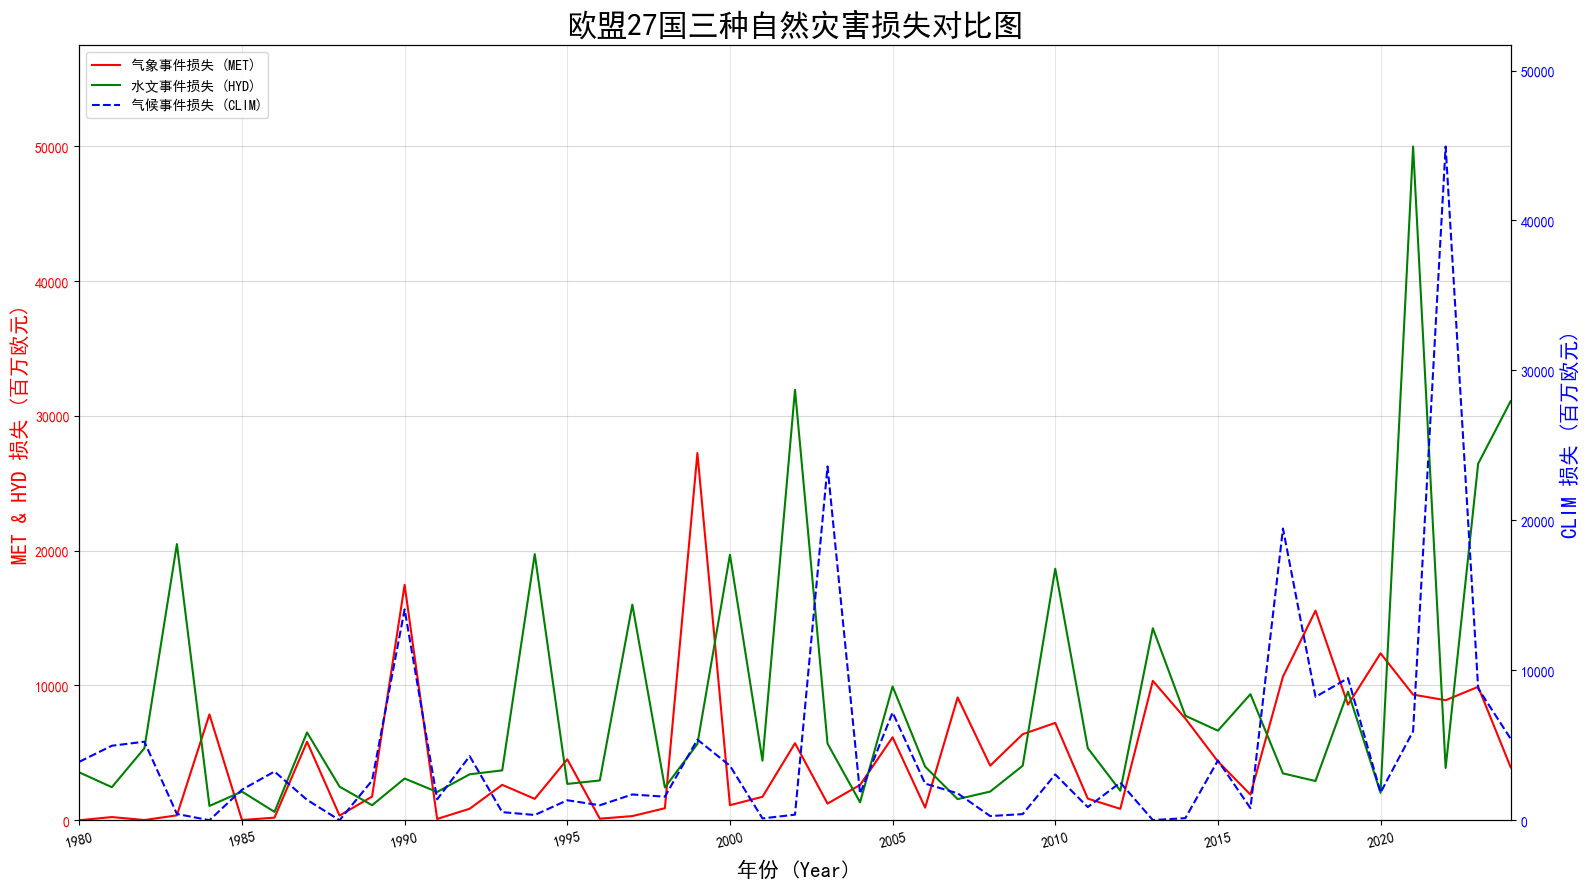

In [6]:
#堆叠折线图 - 比较欧盟27国(EU27)三种损失子类型趋势
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys

# --- 0. 设置字体 (确保中文显示) ---
plt.rcParams['font.family'] = ['Times New Roman', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# --- 1. 准备数据 ---
try:
    df = pd.read_csv(r'D:\python_demo\coding\data\欧洲各国与气候相关损失.csv')
except FileNotFoundError:
    print("错误：CSV文件 '欧洲各国与气候相关损失.csv' 未找到。")
    sys.exit() # 停止执行
except Exception as e:
    print(f"加载数据失败: {e}")
    sys.exit() # 停止执行

# 筛选 EU27 的三种损失子类型
dimensions_to_plot_labels = [
    'Economic losses from weather- and climate-related extremes - Losses by meteorological events', # 气象
    'Economic losses from weather- and climate-related extremes - Losses by hydrological events',   # 水文
    'Economic losses from weather- and climate-related extremes - Losses by climatological events' # 气候
]
# 对应的 'dimension' codes
dimensions_to_plot_codes = ['LOSS_MET', 'LOSS_HYD', 'LOSS_CLIM']

df_filtered = df[
    (df['geo_label'] == 'European Union - 27 countries (from 2020)') &
    (df['dimension'].isin(dimensions_to_plot_codes))
].copy()

# 检查数据
if df_filtered.empty:
    print("错误：未找到 EU27 的 'MET', 'HYD', 'CLIM' 损失数据。")
    sys.exit()

# 将数据从长格式转换为宽格式，以便绘图
df_pivot = df_filtered.pivot_table(
    index='time', 
    columns='dimension_label', # 使用
    values='obs_value',
    fill_value=0 # 填充缺失年份
).sort_index()

# 重命名列以便于引用 (简化标签)
# (获取原始标签)
col_met_label = dimensions_to_plot_labels[0]
col_hyd_label = dimensions_to_plot_labels[1]
col_clim_label = dimensions_to_plot_labels[2]

# 准备 x 轴 (年份) 和 y 轴数据
x = df_pivot.index
y_met = df_pivot[col_met_label]
y_hyd = df_pivot[col_hyd_label]
y_clim = df_pivot[col_clim_label]

# 设置图标样式 (不使用 matplotx)
with plt.style.context('default'): # 使用默认(light)样式
    
    # 创建画布和第一个Y轴
    fig, ax1 = plt.subplots(figsize=(16, 9), dpi=100)
    
    # 绘制左侧Y轴 (Y1)
    # 我们将MET和HYD放在左轴 (因为它们量级通常较大)
    line1, = ax1.plot(x, y_met, linestyle='-', lw=1.5, color='r', label='气象事件损失 (MET)')
    line2, = ax1.plot(x, y_hyd, linestyle='-', lw=1.5, color='green', label='水文事件损失 (HYD)')
    
    # 设置左侧Y轴 (ax1)
    ax1.tick_params(axis='y', labelcolor='red', labelsize=10, grid_color='gray', grid_alpha=0.5)
    ax1.set_ylabel('MET & HYD 损失 (百万欧元)', color='red', fontsize=15)
    
    # 设置X轴 (共享)
    ax1.set_xlabel('年份 (Year)', fontsize=15, labelpad=8, loc='center')
    ax1.grid(alpha=0.3)
    
    # 优化x轴显示 (每5年一个刻度)
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(5)) 
    plt.xticks(fontsize=10, rotation=14)
    plt.yticks(fontsize=10)
    
    # 设置标题
    plt.title('欧盟27国三种自然灾害损失对比图', fontsize=22, loc='center', pad=8)
    
    # 创建共享 X 轴的第二个 Y 轴 (Y2)
    ax2 = ax1.twinx()
    
    # 绘制右侧Y轴 (Y2)
    # 我们将CLIM放在右轴 (因为它量级通常较小)
    line3, = ax2.plot(x, y_clim, linestyle='--', lw=1.5, color='b', label='气候事件损失 (CLIM)')
    
    # 设置右侧Y轴 (ax2)
    ax2.set_ylabel('CLIM 损失 (百万欧元)', color='blue', fontsize=15)
    ax2.tick_params(axis='y', right=True, labelright=True, labelcolor='blue')
    
    # 自动调整Y轴范围 (给顶部留出空间)
    ax1_max = max(y_met.max(), y_hyd.max())
    ax1.set_ylim(0, ax1_max * 1.15 if ax1_max > 0 else 1) # 避免max为0时出错
    
    ax2_max = y_clim.max()
    ax2.set_ylim(0, ax2_max * 1.15 if ax2_max > 0 else 1) # 避免max为0时出错
    
    # 自动调整X轴范围
    ax1.set_xlim(x.min(), x.max())

    # 创建一个包含所有三条线的图例
    plt.legend(handles=[line1, line2, line3], loc='upper left')

plt.tight_layout() # 调整布局
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\229483689.py:16: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('D:\python_demo\coding\data\欧洲各国与气候相关损失.csv')
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\229483689.py:208: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\229483689.py:208: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\229483689.py:208: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\229483689.py:208: UserWarning: Glyph 27982 (\N{CJK UNIFIED IDEOGRAPH-6D4E}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

正在准备数据...
[3898.0, 4968.0, 5238.0, 418.0, 0.0, 2036.0, 3248.0, 1362.0, 0.0, 2648.0, 14065.0, 1393.0, 4273.0, 540.0, 350.0, 1332.0, 1000.0, 1719.0, 1569.0, 5377.0, 3636.0, 121.0, 371.0, 23596.0, 1772.0, 7186.0, 2442.0, 1793.0, 279.0, 409.0, 3052.0, 877.0, 2511.0, 9.0, 141.0, 3986.0, 804.0, 19452.0, 8227.0, 9475.0, 1849.0, 5934.0, 44932.0, 8790.0, 5430.0]
数据准备完毕。
注意：'matplotx' 库在当前环境不可用。将使用标准的 matplotlib 'default' 样式模拟您提供的 'light' 风格。


C:\Users\25711\AppData\Local\Temp\ipykernel_23840\229483689.py:209: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.savefig('stacked_bar_rounded_losses_by_type.png', dpi=300)
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\229483689.py:209: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  plt.savefig('stacked_bar_rounded_losses_by_type.png', dpi=300)
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\229483689.py:209: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from font(s) DejaVu Sans.
  plt.savefig('stacked_bar_rounded_losses_by_type.png', dpi=300)
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\229483689.py:209: UserWarning: Glyph 27982 (\N{CJK UNIFIED IDEOGRAPH-6D4E}) missing from font(s) DejaVu Sans.
  plt.savefig('stacked_bar_rounded_losses_by_type.png', dpi=300)
C:\Users\25711\AppData\Local\Temp\ipykernel_23840\229483689.py:209: UserWarning: Glyph 25439 (\N{CJK

绘图完毕！图表已保存为 'stacked_bar_rounded_losses_by_type.png'


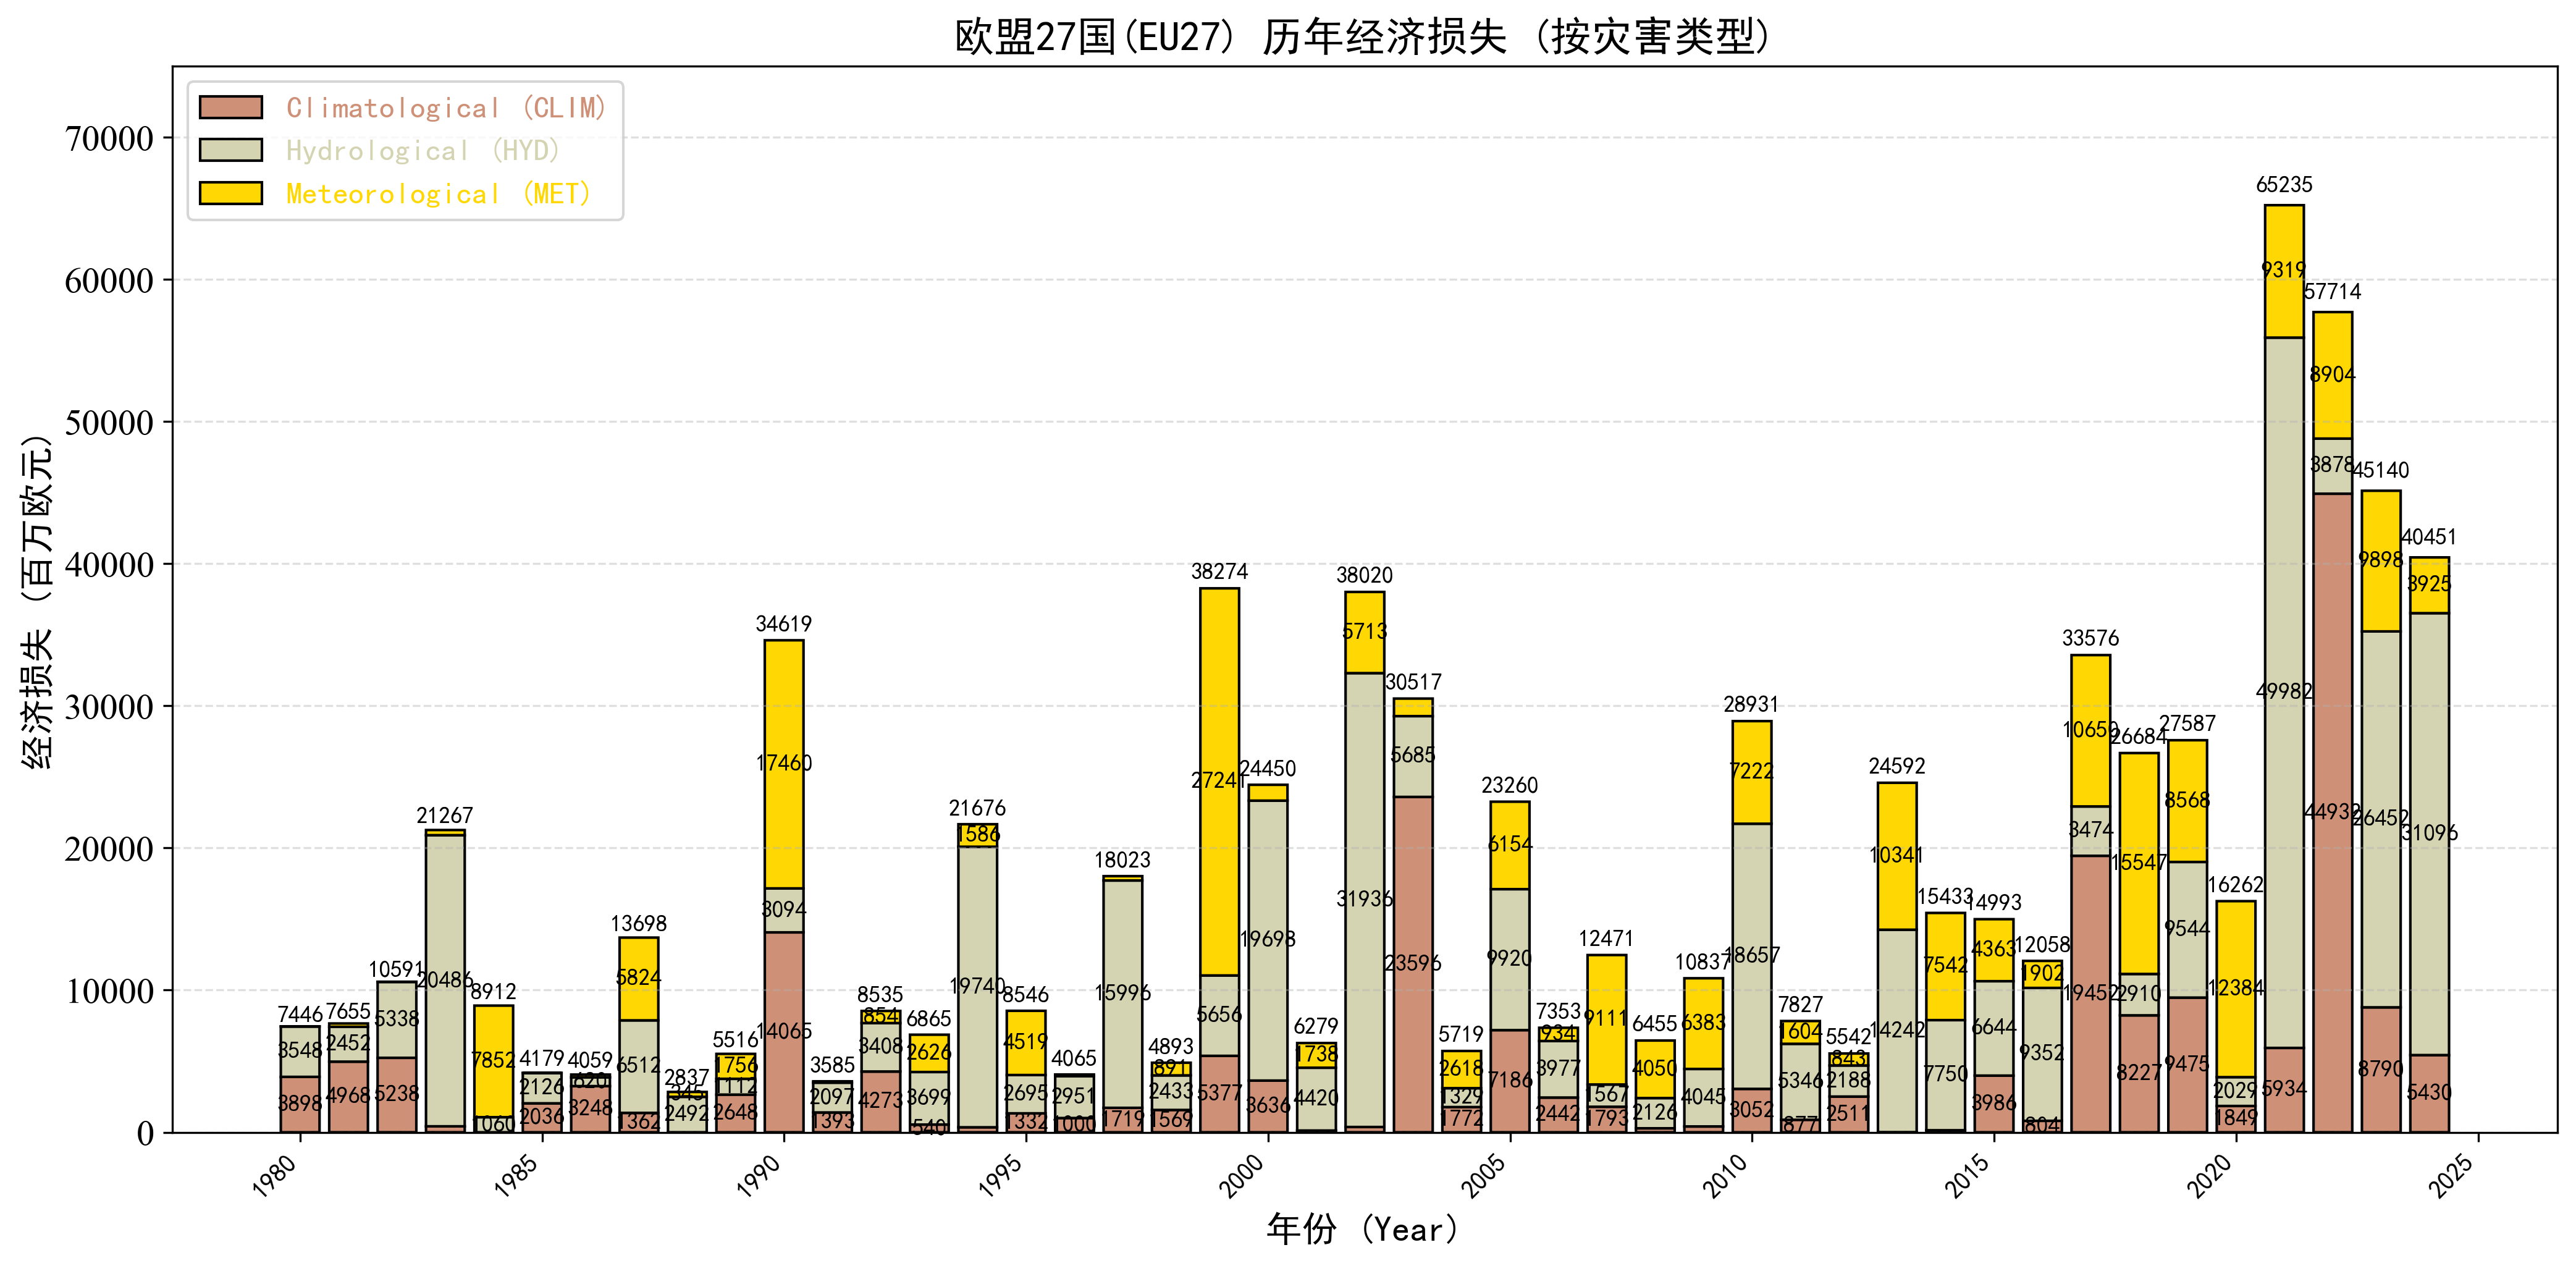

In [7]:
#堆叠条形图 - 比较欧盟27国(EU27)三种损失子类型趋势
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch #其用于创建复杂的无衬线字体为罗马字体
import matplotlib.ticker as ticker
import sys

# --- 0. 设置字体 (确保中文显示) ---
plt.rcParams['font.family'] = ['Times New Roman', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# --- 1. 准备数据 ---
print("正在准备数据...")
try:
    df = pd.read_csv('D:\python_demo\coding\data\欧洲各国与气候相关损失.csv')
except FileNotFoundError:
    print("错误：CSV文件 '欧洲各国与气候相关损失.csv' 未找到。")
    sys.exit() # 停止执行
except Exception as e:
    print(f"加载数据失败: {e}")
    sys.exit() # 停止执行

# 筛选 EU27 的三种损失子类型
dimensions_to_plot_labels = [
    'Economic losses from weather- and climate-related extremes - Losses by climatological events', # 气候
    'Economic losses from weather- and climate-related extremes - Losses by hydrological events',   # 水文
    'Economic losses from weather- and climate-related extremes - Losses by meteorological events' # 气象
]
dimensions_to_plot_codes = ['LOSS_CLIM', 'LOSS_HYD', 'LOSS_MET']

df_filtered = df[
    (df['geo_label'] == 'European Union - 27 countries (from 2020)') &
    (df['dimension'].isin(dimensions_to_plot_codes))
].copy()

# 检查数据
if df_filtered.empty:
    print("错误：未找到 EU27 的 'MET', 'HYD', 'CLIM' 损失数据。")
    sys.exit()

# 将数据从长格式转换为宽格式，以便绘图
pivot_df = df_filtered.pivot_table(
    index='time', 
    columns='dimension_label', # 使用
    values='obs_value',
    fill_value=0 # 填充缺失年份
).sort_index()

# 确保所有三列都存在，即使数据中缺失
for label in dimensions_to_plot_labels:
    if label not in pivot_df.columns:
        pivot_df[label] = 0
        print(f"警告：数据中未找到 '{label}'，已填充为 0。")
x = pivot_df.index.tolist()
y_clim = pivot_df[dimensions_to_plot_labels[0]].tolist()
y_hyd = pivot_df[dimensions_to_plot_labels[1]].tolist()
y_met = pivot_df[dimensions_to_plot_labels[2]].tolist()
print(y_clim)
print("数据准备完毕。")
print("注意：'matplotx' 库在当前环境不可用。将使用标准的 matplotlib 'default' 样式模拟您提供的 'light' 风格。")

# --- 2. 复制您提供的绘图函数 ---
def get_round_rect(ax, rects):
    #将原始的直角柱子转换为圆角柱子工具函数
    for rect_group in rects:
        for rect in rect_group:
            # 移除原始的矩形
            rect.remove()
            # 获取矩形的位置和大小
            bb = rect.get_bbox()
            # 创建一个圆角的 FancyBboxPatch
            patch = FancyBboxPatch(
                (bb.xmin, bb.ymin), # (x, y)
                abs(bb.width),
                abs(bb.height),
                boxstyle='Round, pad=0, rounding_size=0.25',
                ec='black',
                fc=rect.get_facecolor(), # 自动继承颜色
                mutation_aspect=4, 
                mutation_scale=1, #其作用是缩放
            )
            # 将圆角矩形添加到图表中
            ax.add_patch(patch)

# with plt.style.context(matplotx.styles.pitaya_smoothie['light']): # <- matplotx 不可用
with plt.style.context('default'): # 使用默认 'light' 样式替代
    plt.figure(figsize=(14, 7), dpi=300)
    
    # --- 绘制堆叠条形图 ---
    
    # 底部: CLIM (Climatological) - 对应 '铜牌' 样式
    rects_clim = plt.bar(
        x, 
        y_clim,
        label="Climatological (CLIM)", # 替换图例
        edgecolor='black',
        linewidth=1,
        color='#ce9178' # '铜牌' 颜色
    )
    
    # 中间: HYD (Hydrological) - 对应 '银牌' 样式
    rects_hyd = plt.bar(
        x, 
        y_hyd,
        bottom=y_clim, # 设置底部位置
        label="Hydrological (HYD)", # 替换图例
        edgecolor='black',
        linewidth=1,
        color='#d4d4b2', # '银牌' 颜色
    )
    
    # 顶部: MET (Meteorological) - 对应 '金牌' 样式
    bottom_met = [c + h for c, h in zip(y_clim, y_hyd)]
    rects_met = plt.bar(
        x, 
        y_met,
        label="Meteorological (MET)", # 替换图例
        bottom=bottom_met,
        edgecolor='black',
        linewidth=1,
        color='#ffd703' # '金牌' 颜色
    )
    
    # --- 应用圆角 ---
    ax = plt.gca()
    get_round_rect(ax, rects=[rects_clim, rects_hyd, rects_met])
    
    # --- 设置标签，刻度，图例 ---
    plt.title('欧盟27国(EU27) 历年经济损失 (按灾害类型)', fontsize=16) # 替换标题
    plt.xlabel('年份 (Year)', fontsize=14) # 替换 X 轴标签
    plt.ylabel('经济损失 (百万欧元)', fontsize=14) # 替换 Y 轴标签
    plt.legend(loc=2, labelcolor='markerfacecolor', fontsize=12)

    # X轴刻度 (每5年显示一次)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.xticks(rotation=45, ha='right')
    
    # Y轴刻度 (使用 Times New Roman)
    plt.yticks(
        fontproperties='Times New Roman',
        fontsize=14
    )
    
    # --- 添加文本标签 ---
    max_total = 0 # 用于设置Y轴上限
    
    for i in range(len(x)):
        year = x[i]
        clim_val = y_clim[i]
        hyd_val = y_hyd[i]
        met_val = y_met[i]
        total = clim_val + hyd_val + met_val
        
        if total > max_total:
            max_total = total
        
        # (为避免标签重叠，只在数值大于总高度5%时显示)
        
        # CLIM (底部)
        if clim_val > total * 0.05:
            plt.text(
                year,
                clim_val/2, #y坐标：高度的1/2
                f'{clim_val:.0f}', #显示内容
                va='center', ha='center',
                color='black',
                fontsize=9
            )
        
        # HYD (中间)
        if hyd_val > total * 0.05:
            plt.text(
                year,
                hyd_val/2 + clim_val, #y坐标：银牌1/2 + 铜牌
                f'{hyd_val:.0f}',
                va='center', ha='center',
                color='black',
                fontsize=9
            )
        
        # MET (顶部)
        if met_val > total * 0.05:
            plt.text(
                year,
                met_val/2 + hyd_val + clim_val, #y坐标：金牌1/2 + 银牌 + 铜牌
                f'{met_val:.0f}',
                va='center', ha='center',
                color='black',
                fontsize=9
            )
        
        # 总计 (在柱子上方)
        if total > 0:
            plt.text(
                year,
                total + (max_total * 0.01), # 在总高度上方一点
                f'{total:.0f}',
                va='bottom', ha='center',
                color='black',
                fontsize=9
            )
            
    # 设置Y轴上限
    plt.ylim(-0.5, max_total * 1.15) # 留出15%的空间给顶部的总计标签
    
    plt.grid(axis='y', linestyle='--', alpha=0.4) # 添加Y轴网格线
    plt.tight_layout()
    plt.savefig('stacked_bar_rounded_losses_by_type.png', dpi=300)
    print("绘图完毕！图表已保存为 'stacked_bar_rounded_losses_by_type.png'")

数据加载成功！
所有图表已集中到一个画布并保存为 '欧洲气候损失综合分析.png'


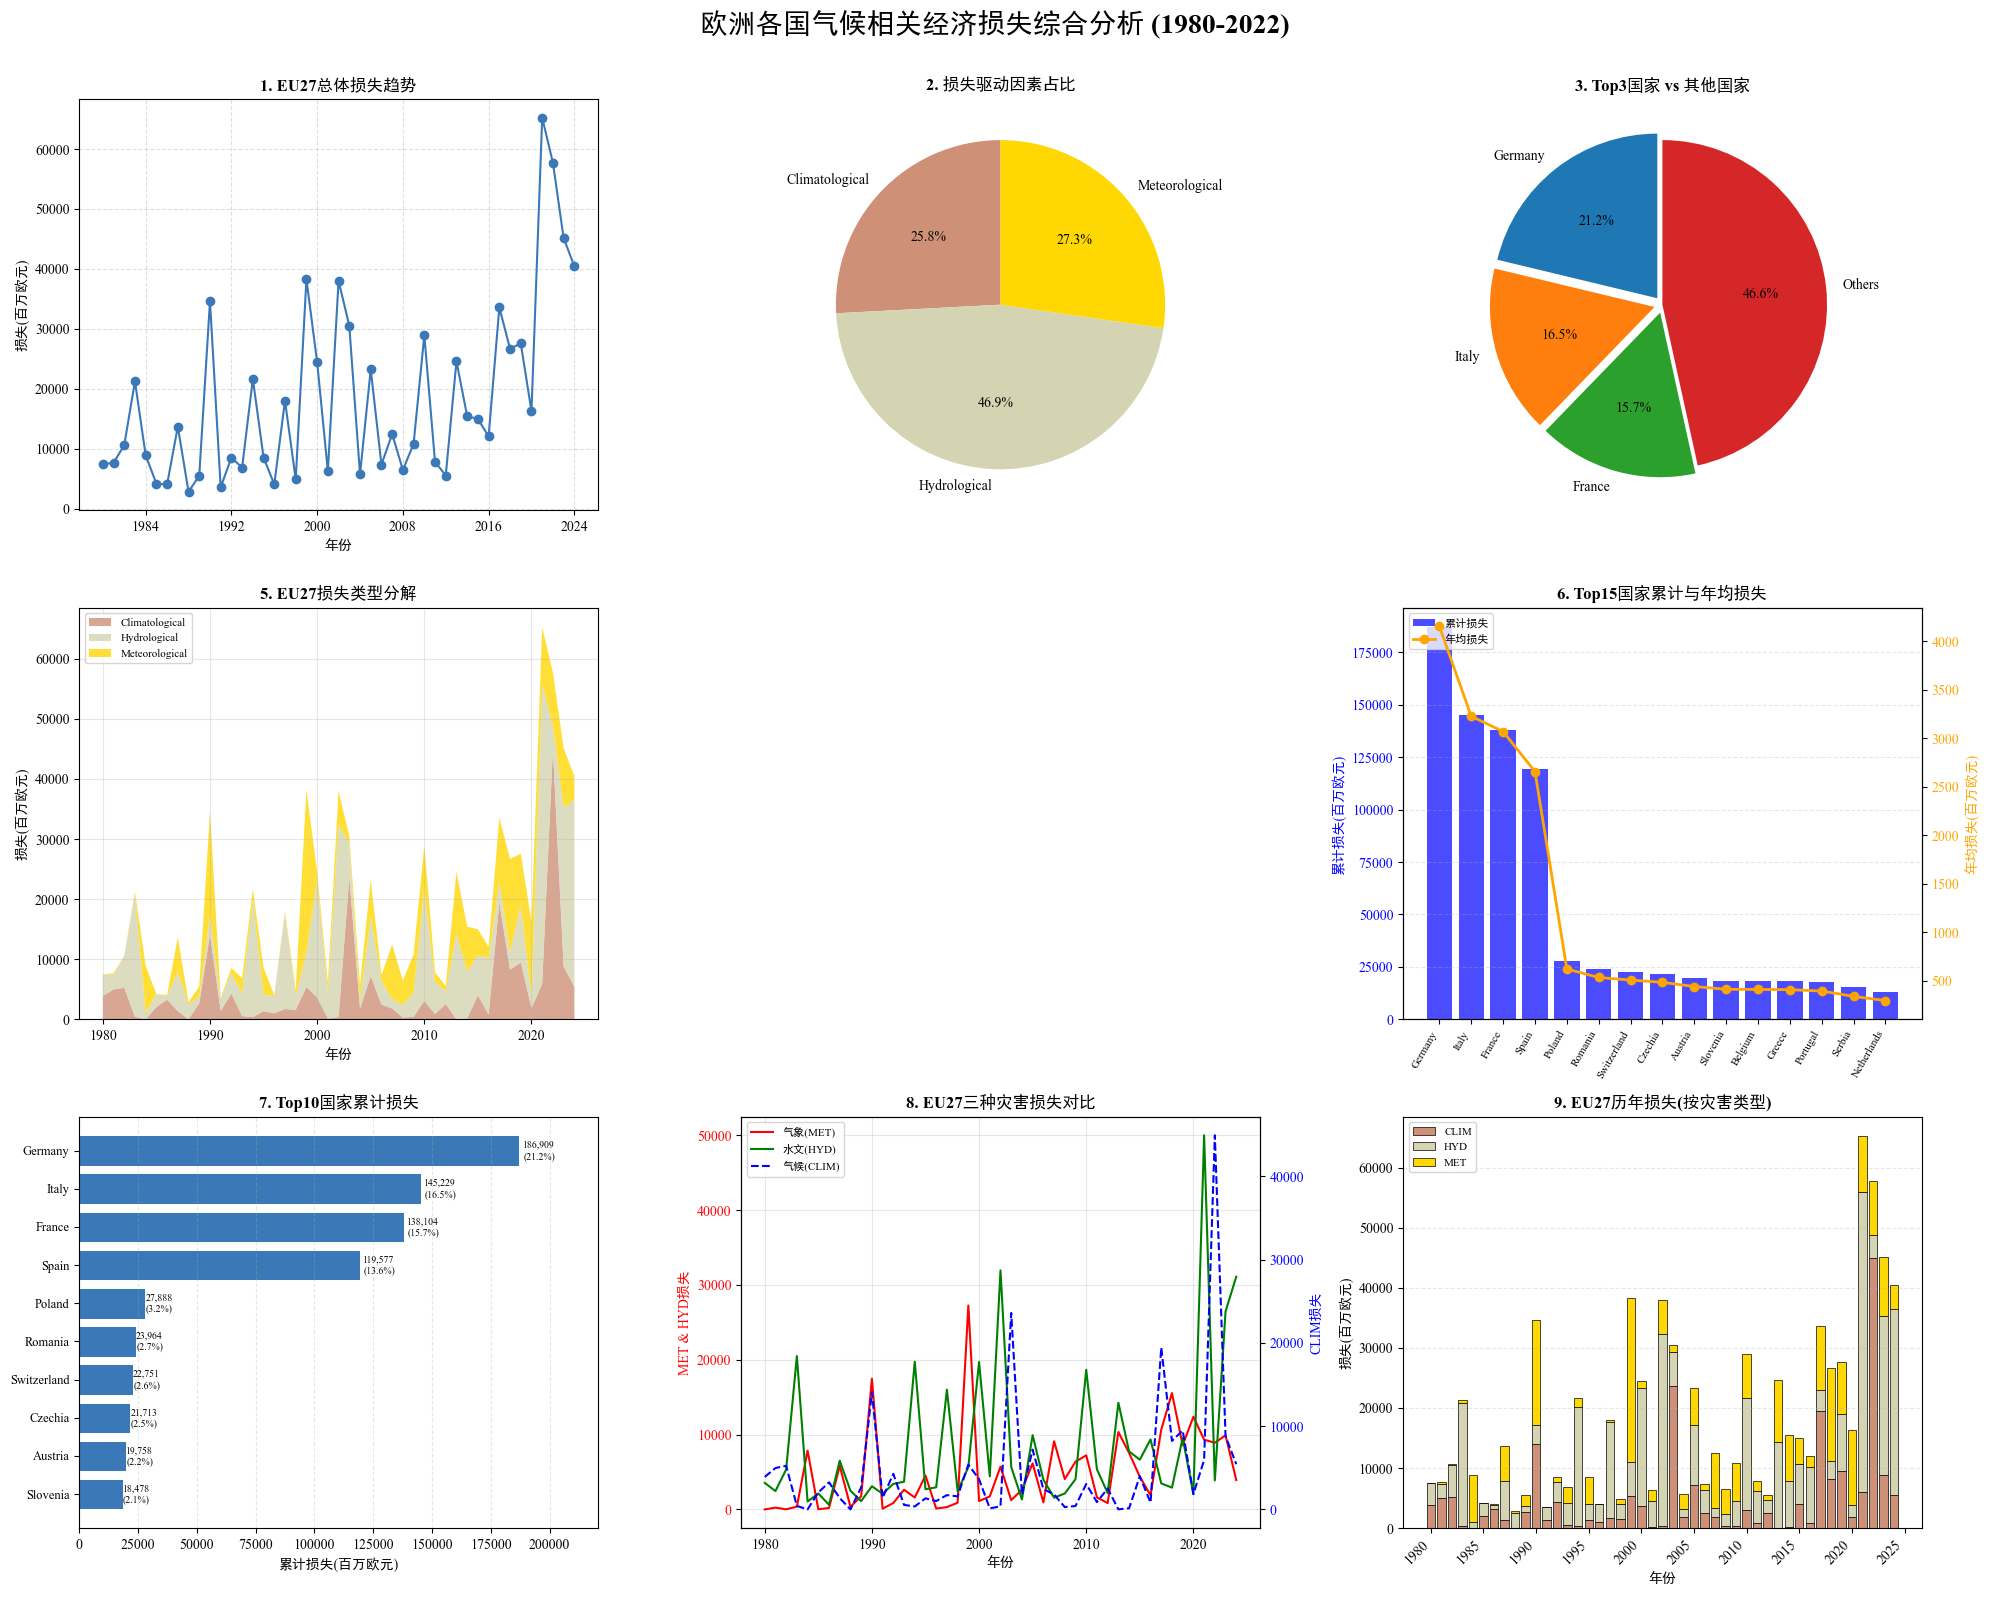

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from textwrap import shorten
from matplotlib.patches import FancyBboxPatch

# --- 0. 设置字体 (确保中文显示) ---
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

# --- 1. 加载数据 ---
file_path = r'D:\python_demo\coding\data\欧洲各国与气候相关损失.csv'
df = pd.read_csv(file_path)
print("数据加载成功！")

# --- 2. 创建大画布 (3行3列) ---
fig = plt.figure(figsize=(20, 16), dpi=100)
fig.suptitle('欧洲各国气候相关经济损失综合分析 (1980-2022)', fontsize=20, fontweight='bold', y=0.995)

# ========== 图1: EU27总体损失趋势 (折线图) ==========
ax1 = plt.subplot(3, 3, 1)
eu_total_loss_df = df[
    (df['geo_label'] == 'European Union - 27 countries (from 2020)') &
    (df['dimension'] == 'LOSS')
].copy()
eu_total_loss_df['time'] = eu_total_loss_df['time'].astype(int)
eu_total_loss_df = eu_total_loss_df.sort_values(by='time')

ax1.plot(eu_total_loss_df['time'], eu_total_loss_df['obs_value'], marker='o', linestyle='-', color='#3A78B7')
ax1.set_title('1. EU27总体损失趋势', fontsize=12, fontweight='bold')
ax1.set_xlabel('年份', fontsize=10)
ax1.set_ylabel('损失(百万欧元)', fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.4)
ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True, nbins=8))

# ========== 图2: 损失驱动因素饼图 ==========
ax2 = plt.subplot(3, 3, 2)
eu_breakdown_df = df[
    (df['geo_label'] == 'European Union - 27 countries (from 2020)') &
    (df['dimension'].isin(['LOSS_MET', 'LOSS_HYD', 'LOSS_CLIM']))
].copy()
driver_summary = eu_breakdown_df.groupby('dimension_label')['obs_value'].sum()
labels_map = {
    'Economic losses from weather- and climate-related extremes - Losses by climatological events': 'Climatological',
    'Economic losses from weather- and climate-related extremes - Losses by hydrological events': 'Hydrological',
    'Economic losses from weather- and climate-related extremes - Losses by meteorological events': 'Meteorological'
}
pie_labels = driver_summary.index.map(labels_map)
colors = ['#ce9178', '#d4d4b2', '#ffd703']
ax2.pie(driver_summary.values, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('2. 损失驱动因素占比', fontsize=12, fontweight='bold')

# ========== 图3: 高风险地理区域饼图 ==========
ax3 = plt.subplot(3, 3, 3)
country_losses_df = df[
    (df['dimension'] == 'LOSS') &
    (df['geo_label'] != 'European Union - 27 countries (from 2020)')
].copy()
total_loss_by_country = country_losses_df.groupby('geo_label')['obs_value'].sum()
top_3_countries = ['Germany', 'Italy', 'France']
top_3_loss_sum = total_loss_by_country[top_3_countries].sum()
other_loss_sum = total_loss_by_country.sum() - top_3_loss_sum
pie_labels_countries = top_3_countries + ['Others']
pie_values_countries = total_loss_by_country[top_3_countries].tolist() + [other_loss_sum]
explode = (0.05, 0.05, 0.05, 0)
ax3.pie(pie_values_countries, labels=pie_labels_countries, autopct='%1.1f%%', startangle=90, explode=explode)
ax3.set_title('3. Top3国家 vs 其他国家', fontsize=12, fontweight='bold')

# ========== 图4: Top15国家条形图 ==========
# ax4 = plt.subplot(3, 3, 4)
# top_15_countries = total_loss_by_country.sort_values(ascending=False).head(15)
# ax4.barh(range(len(top_15_countries)), top_15_countries.values, color='skyblue', edgecolor='navy')
# ax4.set_yticks(range(len(top_15_countries)))
# ax4.set_yticklabels([shorten(s, width=20, placeholder='...') for s in top_15_countries.index], fontsize=9)
# ax4.set_xlabel('累计损失(百万欧元)', fontsize=10)
# ax4.set_title('4. Top15国家累计损失', fontsize=12, fontweight='bold')
# ax4.grid(axis='x', linestyle='--', alpha=0.4)
# ax4.invert_yaxis()

# ========== 图5: 损失类型堆叠面积图 ==========
ax5 = plt.subplot(3, 3, 4)
pivot_df = eu_breakdown_df.pivot_table(
    index='time', columns='dimension_label', values='obs_value', fill_value=0
).sort_index()
years = pivot_df.index
data_to_stack = np.vstack([pivot_df[col].values for col in pivot_df.columns])
ax5.stackplot(years, data_to_stack, labels=[labels_map.get(col, col) for col in pivot_df.columns], alpha=0.8, colors=colors)
ax5.set_title('5. EU27损失类型分解', fontsize=12, fontweight='bold')
ax5.set_xlabel('年份', fontsize=10)
ax5.set_ylabel('损失(百万欧元)', fontsize=10)
ax5.legend(loc='upper left', fontsize=8)
ax5.grid(alpha=0.3)

# ========== 图6: Top15国家双轴图 ==========
ax6 = plt.subplot(3, 3, 6)
grouped = country_losses_df.groupby('geo_label')['obs_value']
summary_df = grouped.agg(Total_Loss='sum', Data_Years='count').reset_index()
summary_df['Average_Loss'] = summary_df['Total_Loss'] / summary_df['Data_Years']
df_plot = summary_df.sort_values(by='Total_Loss', ascending=False).head(15).reset_index(drop=True)
x_pos = np.arange(len(df_plot))

bar = ax6.bar(x_pos, df_plot['Total_Loss'], color='blue', alpha=0.7, label='累计损失')
ax6.set_ylabel('累计损失(百万欧元)', fontsize=10, color='blue')
ax6.tick_params(axis='y', labelcolor='blue')
ax6.set_xticks(x_pos)
ax6.set_xticklabels([shorten(s, width=12, placeholder='...') for s in df_plot['geo_label']], 
                     rotation=60, ha='right', fontsize=8)
ax6.set_title('6. Top15国家累计与年均损失', fontsize=12, fontweight='bold')

ax6_2 = ax6.twinx()
ax6_2.plot(x_pos, df_plot['Average_Loss'], color='orange', marker='o', label='年均损失', linewidth=2)
ax6_2.set_ylabel('年均损失(百万欧元)', fontsize=10, color='orange')
ax6_2.tick_params(axis='y', labelcolor='orange')

lines1, labels1 = ax6.get_legend_handles_labels()
lines2, labels2 = ax6_2.get_legend_handles_labels()
ax6.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=8)
ax6.grid(axis='y', linestyle='--', alpha=0.3)

# ========== 图7: Top10横向条形图 ==========
ax7 = plt.subplot(3, 3, 7)
top10 = total_loss_by_country.nlargest(10).reset_index()
top10.columns = ['region', 'cnt']
t10 = top10.sort_values('cnt')
total_all = total_loss_by_country.sum()

bars = ax7.barh(range(len(t10)), t10['cnt'], color='#3A78B7', edgecolor='white', linewidth=0.7)
ax7.set_yticks(range(len(t10)))
ax7.set_yticklabels([shorten(s, width=18, placeholder='...') for s in t10['region']], fontsize=9)
ax7.set_xlabel('累计损失(百万欧元)', fontsize=10)
ax7.set_title('7. Top10国家累计损失', fontsize=12, fontweight='bold')

for i, (name, cnt) in enumerate(zip(t10['region'], t10['cnt'])):
    ax7.text(cnt * 1.01, i, f'{cnt:,.0f}\n({cnt/total_all*100:.1f}%)', 
             va='center', fontsize=7)
ax7.grid(axis='x', linestyle='--', alpha=0.3)
ax7.set_xlim(0, t10['cnt'].max() * 1.18)

# ========== 图8: 三种损失双Y轴折线图 ==========
ax8 = plt.subplot(3, 3, 8)
dimensions_labels = [
    'Economic losses from weather- and climate-related extremes - Losses by meteorological events',
    'Economic losses from weather- and climate-related extremes - Losses by hydrological events',
    'Economic losses from weather- and climate-related extremes - Losses by climatological events'
]
df_filtered = df[
    (df['geo_label'] == 'European Union - 27 countries (from 2020)') &
    (df['dimension'].isin(['LOSS_MET', 'LOSS_HYD', 'LOSS_CLIM']))
].copy()
df_pivot = df_filtered.pivot_table(index='time', columns='dimension_label', values='obs_value', fill_value=0).sort_index()

x_years = df_pivot.index
y_met = df_pivot[dimensions_labels[0]]
y_hyd = df_pivot[dimensions_labels[1]]
y_clim = df_pivot[dimensions_labels[2]]

line1, = ax8.plot(x_years, y_met, 'r-', lw=1.5, label='气象(MET)')
line2, = ax8.plot(x_years, y_hyd, 'g-', lw=1.5, label='水文(HYD)')
ax8.set_ylabel('MET & HYD损失', fontsize=10, color='red')
ax8.tick_params(axis='y', labelcolor='red')
ax8.set_xlabel('年份', fontsize=10)
ax8.set_title('8. EU27三种灾害损失对比', fontsize=12, fontweight='bold')
ax8.grid(alpha=0.3)

ax8_2 = ax8.twinx()
line3, = ax8_2.plot(x_years, y_clim, 'b--', lw=1.5, label='气候(CLIM)')
ax8_2.set_ylabel('CLIM损失', fontsize=10, color='blue')
ax8_2.tick_params(axis='y', labelcolor='blue')
ax8.legend(handles=[line1, line2, line3], loc='upper left', fontsize=8)

# ========== 图9: 堆叠条形图(圆角) ==========
ax9 = plt.subplot(3, 3, 9)
y_clim_list = df_pivot[dimensions_labels[2]].tolist()
y_hyd_list = df_pivot[dimensions_labels[1]].tolist()
y_met_list = df_pivot[dimensions_labels[0]].tolist()
x_years_list = x_years.tolist()

rects_clim = ax9.bar(x_years_list, y_clim_list, color='#ce9178', edgecolor='black', linewidth=0.5, label='CLIM')
rects_hyd = ax9.bar(x_years_list, y_hyd_list, bottom=y_clim_list, color='#d4d4b2', edgecolor='black', linewidth=0.5, label='HYD')
bottom_met = [c + h for c, h in zip(y_clim_list, y_hyd_list)]
rects_met = ax9.bar(x_years_list, y_met_list, bottom=bottom_met, color='#ffd703', edgecolor='black', linewidth=0.5, label='MET')

ax9.set_title('9. EU27历年损失(按灾害类型)', fontsize=12, fontweight='bold')
ax9.set_xlabel('年份', fontsize=10)
ax9.set_ylabel('损失(百万欧元)', fontsize=10)
ax9.legend(loc='upper left', fontsize=8)
ax9.xaxis.set_major_locator(ticker.MultipleLocator(5))
for label in ax9.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
ax9.grid(axis='y', linestyle='--', alpha=0.3)

# --- 调整布局 ---
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig('欧洲气候损失综合分析.png', dpi=150, bbox_inches='tight')
print("所有图表已集中到一个画布并保存为 '欧洲气候损失综合分析.png'")
plt.show()